In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/water-quality-prediction/dataset.csv


In [3]:
#pip install lux-api

In [5]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
#import os, sys  # Operating system ke sath refernce
#import lux  # used for visualization instantly without wring much of the code
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns #for visualization
sns.set()

In [6]:
df=pd.read_csv("/kaggle/input/water-quality-prediction/dataset.csv")
df.head(5)

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,0,8.332988,0.000083,8.605777,122.799772,3.713298e-52,3.434827,Colorless,0.022683,0.607283,...,3.708178,2.269945e-15,332.118789,NaN,NaN,43.493324,January,29.0,4.0,0
1,1,6.917863,0.000081,3.734167,227.029851,7.849262e-94,1.245317,Faint Yellow,0.019007,0.622874,...,3.292038,8.024076e-07,284.641984,Lake,15.348981,71.220586,November,26.0,16.0,0
2,2,5.443762,0.020106,3.816994,230.995630,5.286616e-76,0.528280,Light Yellow,0.319956,0.423423,...,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,January,31.0,8.0,0
3,3,7.955339,0.143988,8.224944,178.129940,3.997118e-176,4.027879,Near Colorless,0.166319,0.208454,...,3.516907,2.468295e-02,100.043838,Ground,10.092392,60.843233,April,1.0,21.0,0
4,4,8.091909,0.002167,9.925788,186.540872,4.171069e-132,3.807511,Light Yellow,0.004867,0.222912,...,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,June,29.0,7.0,0


In [7]:
df.shape

(5956842, 24)

In [8]:
#find null values
df.isnull().sum()

Index                          0
pH                        116054
Iron                       39753
Nitrate                   105725
Chloride                  175531
Lead                       26909
Zinc                      156126
Color                       5739
Turbidity                  49815
Fluoride                  189156
Copper                    199402
Odor                      178891
Sulfate                   197418
Conductivity              163861
Chlorine                   57825
Manganese                 109583
Total Dissolved Solids      1670
Source                     88262
Water Temperature         168233
Air Temperature            29728
Month                      95668
Day                        99603
Time of Day               114519
Target                         0
dtype: int64

In [9]:
#Imputing null values-Replace with some other value
def impute_with_mode(df):
    return df.apply(lambda column: column.fillna(column.mode()[0]), axis=0)

# Applying the function to fill null values with mode for each column
df_imputed = impute_with_mode(df)

In [10]:
df_imputed

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,0,8.332988,0.000083,8.605777,122.799772,3.713298e-52,3.434827,Colorless,0.022683,0.607283,...,3.708178,2.269945e-15,332.118789,Stream,1.369793,43.493324,January,29.0,4.0,0
1,1,6.917863,0.000081,3.734167,227.029851,7.849262e-94,1.245317,Faint Yellow,0.019007,0.622874,...,3.292038,8.024076e-07,284.641984,Lake,15.348981,71.220586,November,26.0,16.0,0
2,2,5.443762,0.020106,3.816994,230.995630,5.286616e-76,0.528280,Light Yellow,0.319956,0.423423,...,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,January,31.0,8.0,0
3,3,7.955339,0.143988,8.224944,178.129940,3.997118e-176,4.027879,Near Colorless,0.166319,0.208454,...,3.516907,2.468295e-02,100.043838,Ground,10.092392,60.843233,April,1.0,21.0,0
4,4,8.091909,0.002167,9.925788,186.540872,4.171069e-132,3.807511,Light Yellow,0.004867,0.222912,...,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,June,29.0,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956837,5956837,8.418457,0.000095,8.427576,256.570863,4.751543e-26,4.967504,Faint Yellow,3.824532,0.541850,...,2.630130,9.608234e-03,545.990529,Well,21.436974,70.493951,February,8.0,8.0,1
5956838,5956838,7.950573,0.215729,4.677850,292.727780,4.679421e-12,1.842063,Near Colorless,1.181166,2.747241,...,3.555576,1.875424e-11,514.136530,Ground,19.064632,67.052475,September,8.0,6.0,1
5956839,5956839,8.145572,0.000005,7.112877,254.831175,3.150254e-56,0.656923,Colorless,1.769609,1.398686,...,3.127251,1.199405e+00,336.947289,Stream,5.863636,64.086020,January,16.0,11.0,1
5956840,5956840,8.273548,0.001236,10.182408,122.842038,4.226073e-33,0.903032,Light Yellow,0.366909,3.076229,...,2.762962,2.824411e+00,112.458644,Stream,28.034083,18.158372,March,29.0,13.0,1


In [13]:
df_imputed.isnull().sum()

Index                     0
pH                        0
Iron                      0
Nitrate                   0
Chloride                  0
Lead                      0
Zinc                      0
Color                     0
Turbidity                 0
Fluoride                  0
Copper                    0
Odor                      0
Sulfate                   0
Conductivity              0
Chlorine                  0
Manganese                 0
Total Dissolved Solids    0
Source                    0
Water Temperature         0
Air Temperature           0
Month                     0
Day                       0
Time of Day               0
Target                    0
dtype: int64

Axes(0.125,0.11;0.775x0.77)


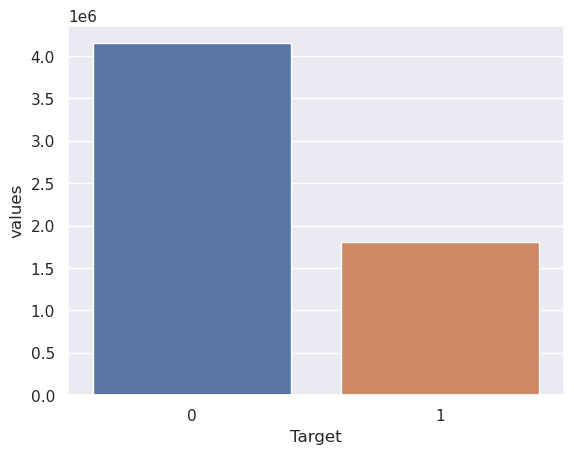

In [15]:
#check label imbalance -Binary classification task
#Label imbalance occurs when the number of data points in each class is
#not roughly equal, leading to a significant difference in class frequencies.

import matplotlib.pyplot as plt
import seaborn as sns

temp = df_imputed['Target'].value_counts()
temp_df = pd.DataFrame({'Target': temp.index, 'values': temp.values})
print(sns.barplot(x='Target', y='values', data=temp_df))

In [16]:
df_imputed.dtypes

Index                       int64
pH                        float64
Iron                      float64
Nitrate                   float64
Chloride                  float64
Lead                      float64
Zinc                      float64
Color                      object
Turbidity                 float64
Fluoride                  float64
Copper                    float64
Odor                      float64
Sulfate                   float64
Conductivity              float64
Chlorine                  float64
Manganese                 float64
Total Dissolved Solids    float64
Source                     object
Water Temperature         float64
Air Temperature           float64
Month                      object
Day                       float64
Time of Day               float64
Target                      int64
dtype: object

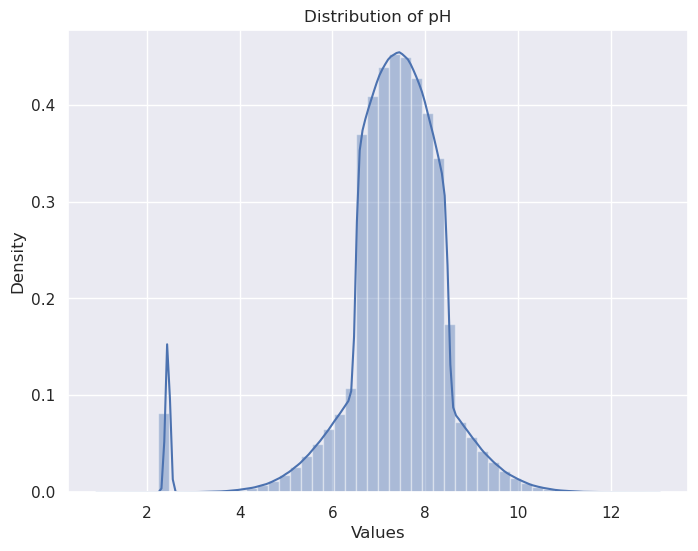

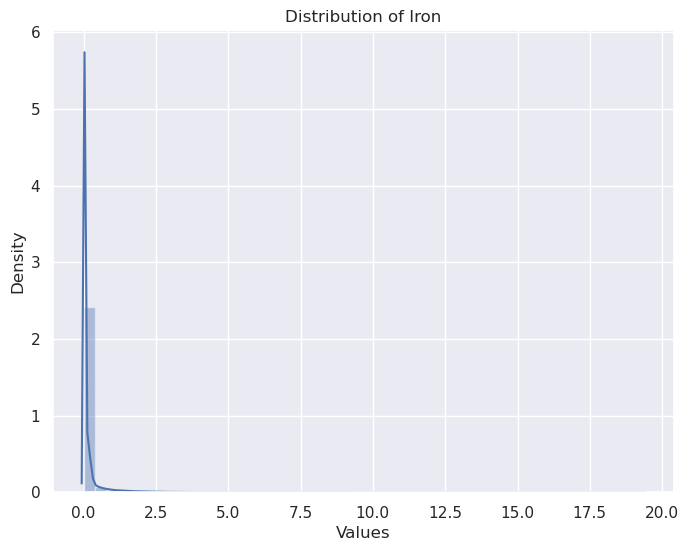

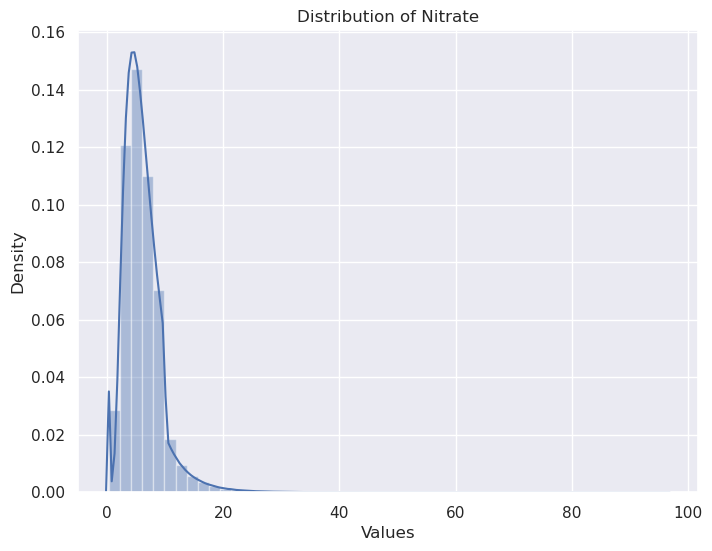

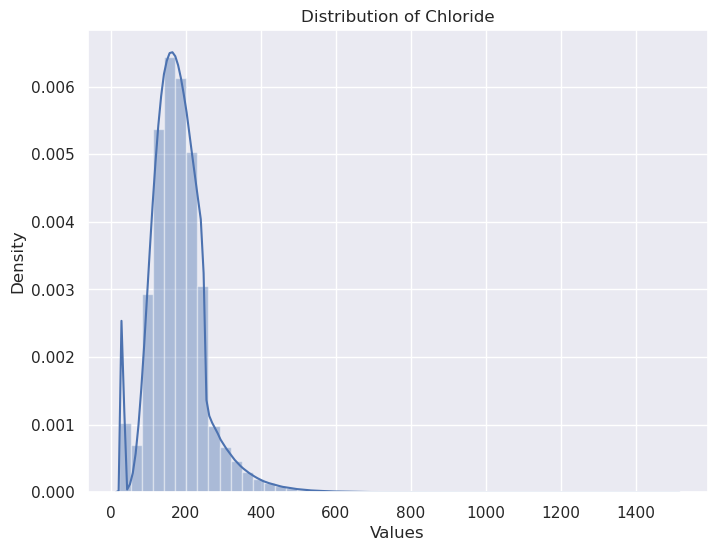

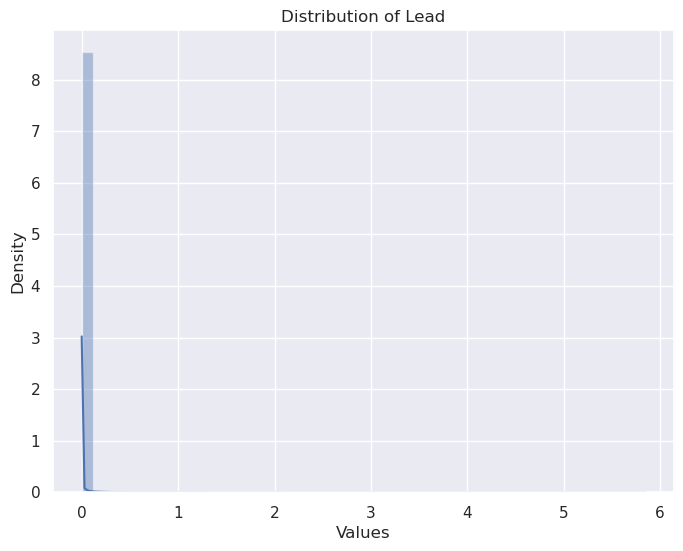

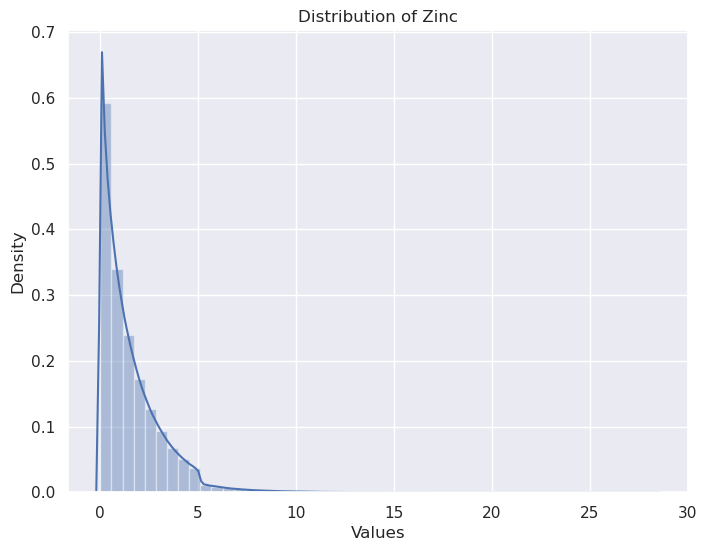

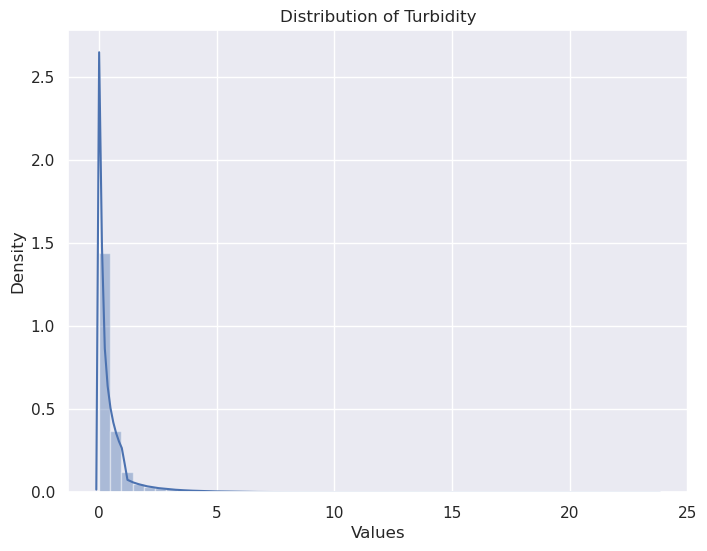

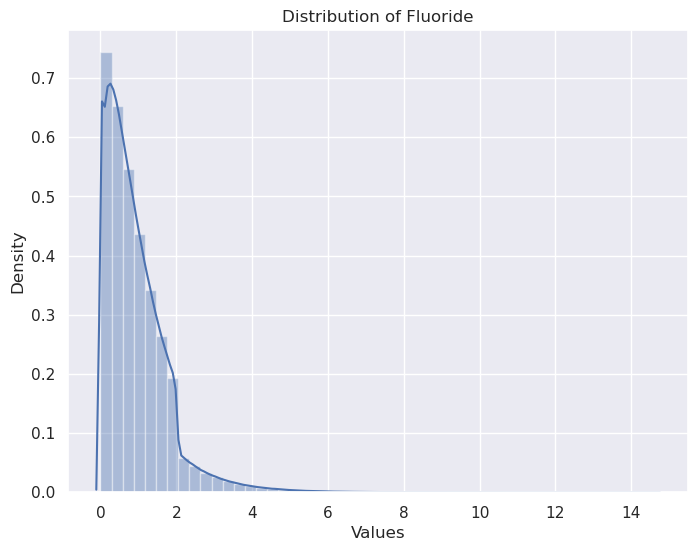

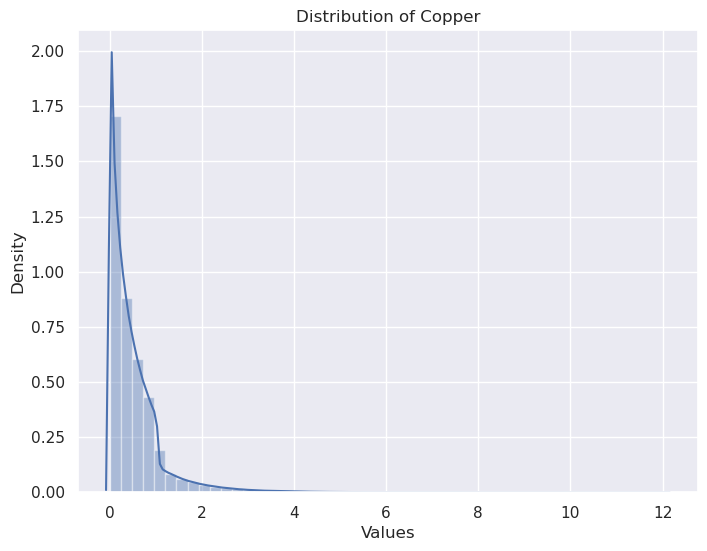

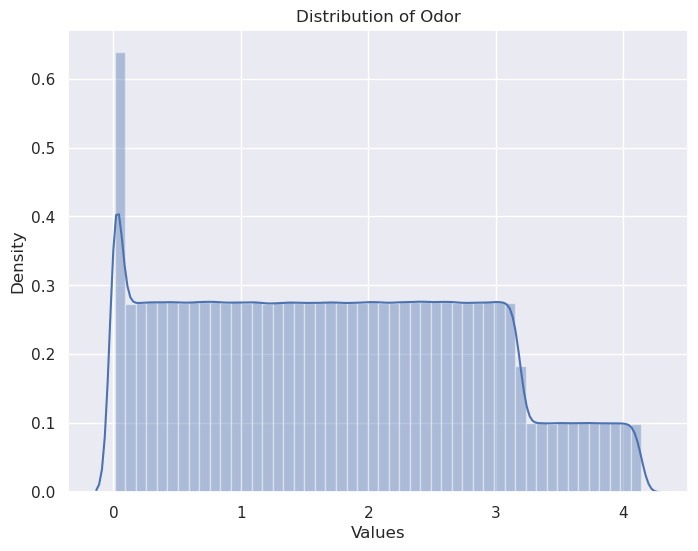

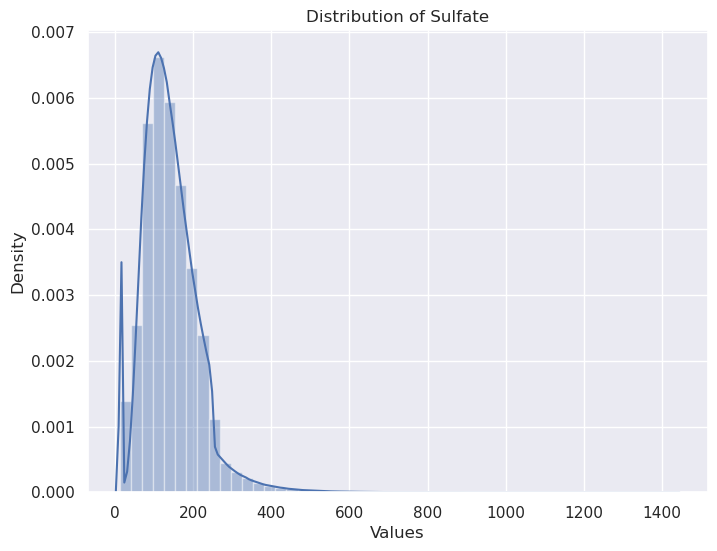

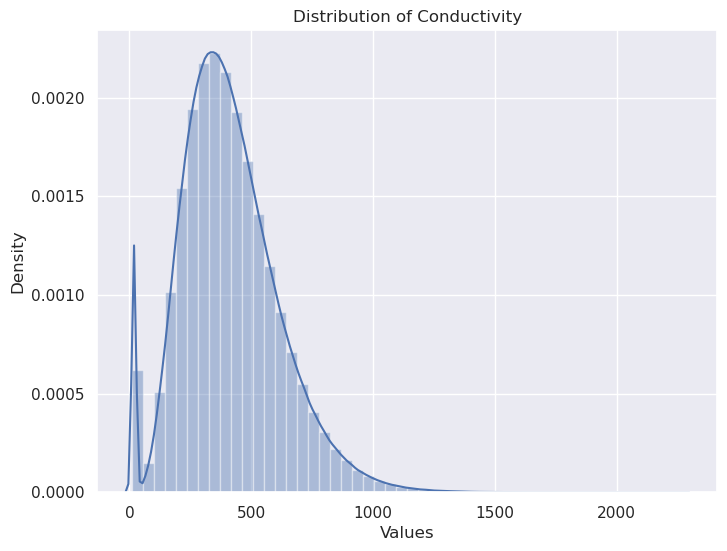

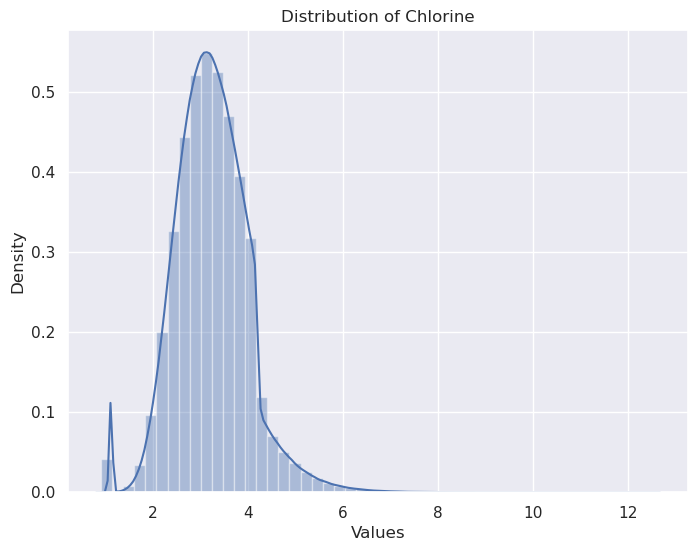

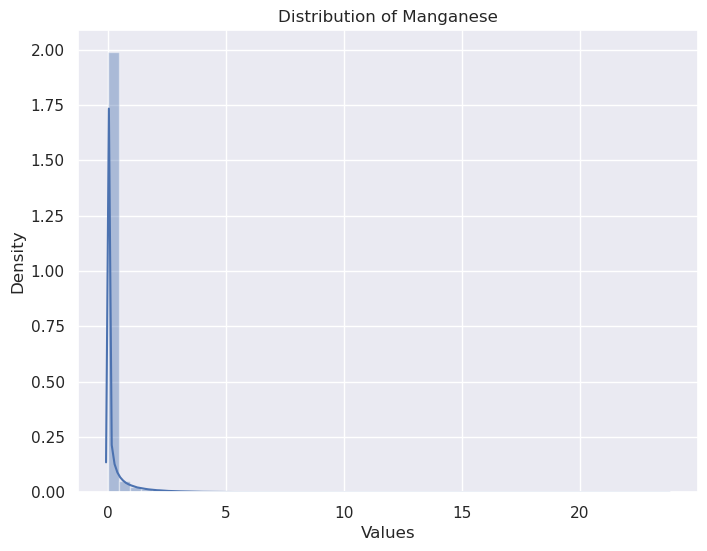

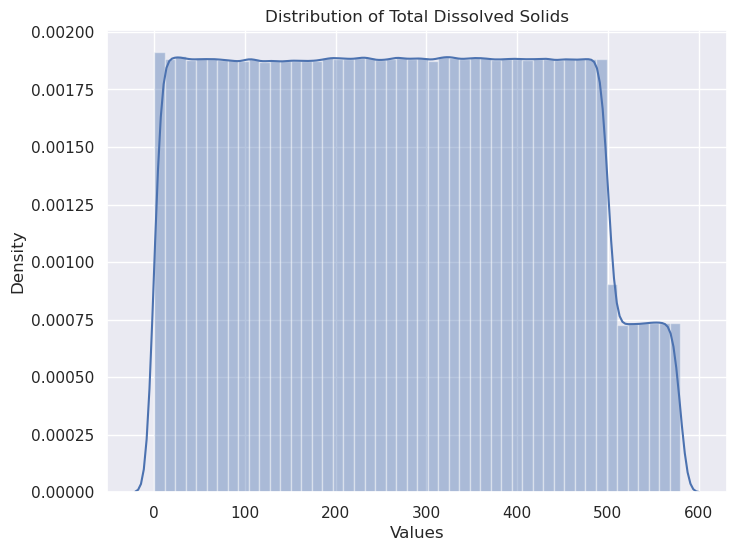

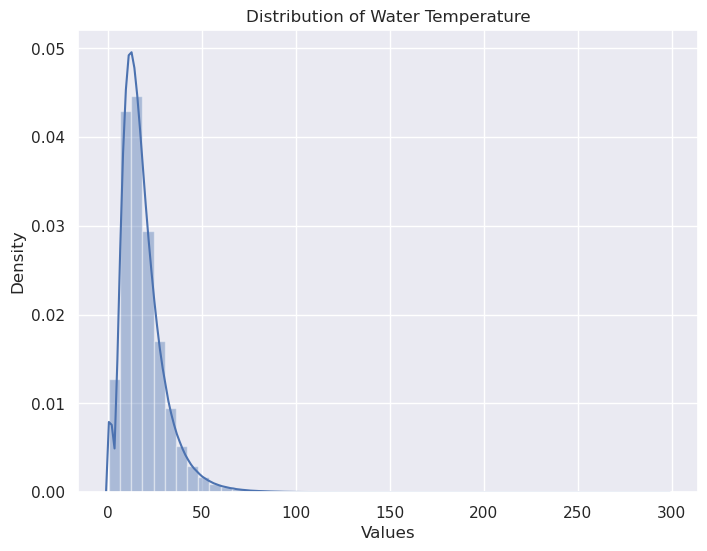

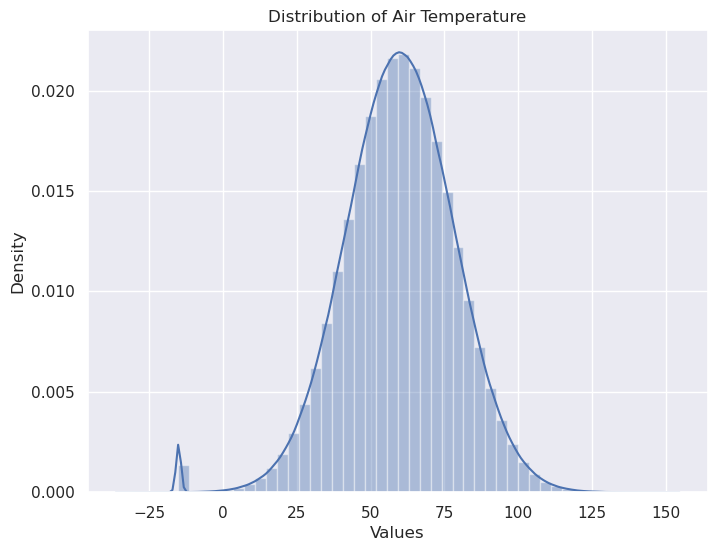

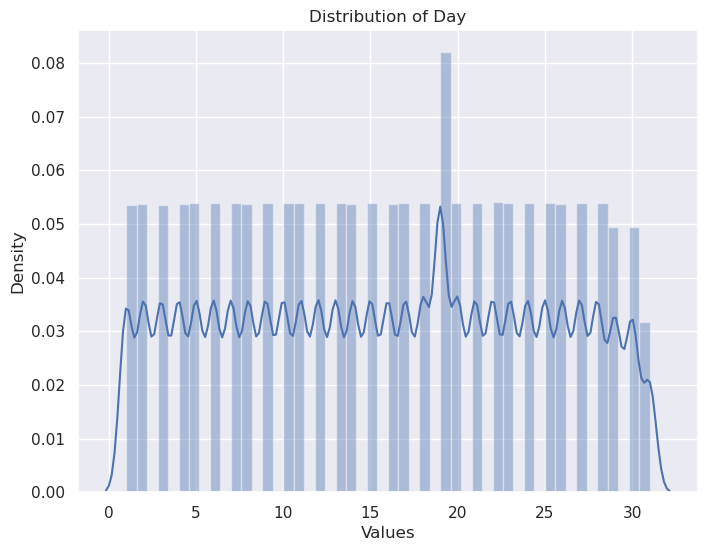

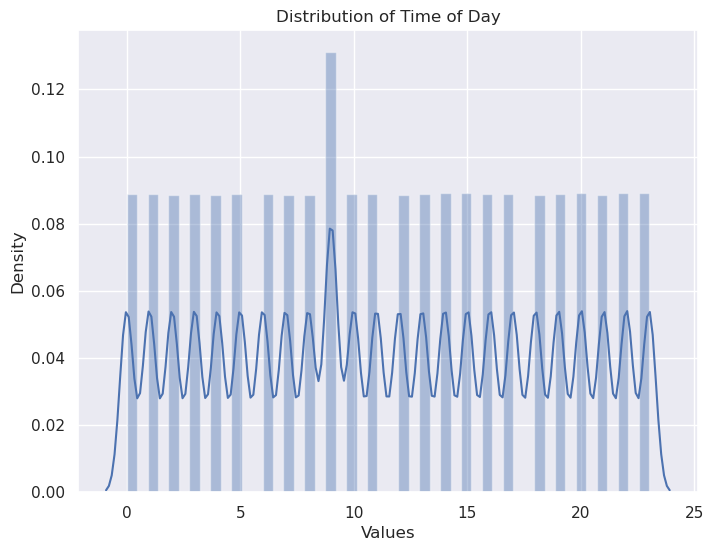

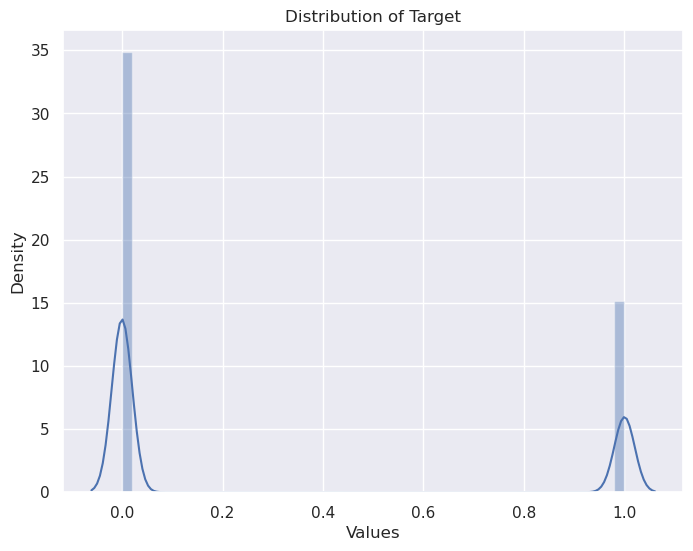

In [22]:
#Find the distribution of data

numerical_cols = df_imputed.select_dtypes(include=['int64', 'float64']).columns[1:]
for column in numerical_cols:
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    
    # Plot the distribution for the current column
    sns.distplot(df_imputed[column])
    
    # Add labels and title
    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.title(f'Distribution of {column}')
    
    # Show the plot
    plt.show()

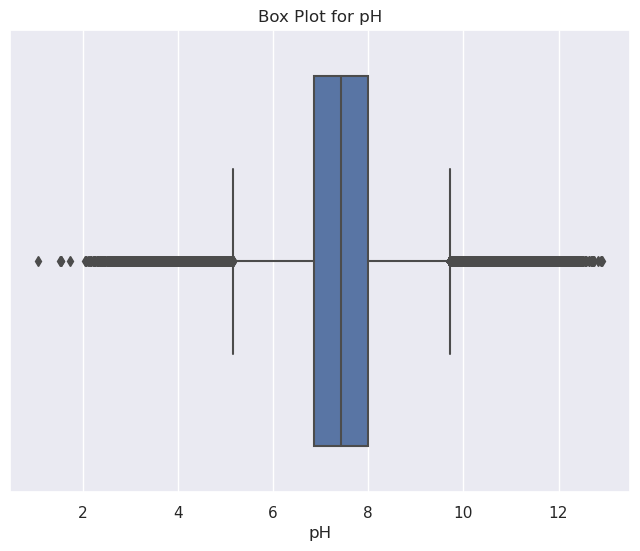

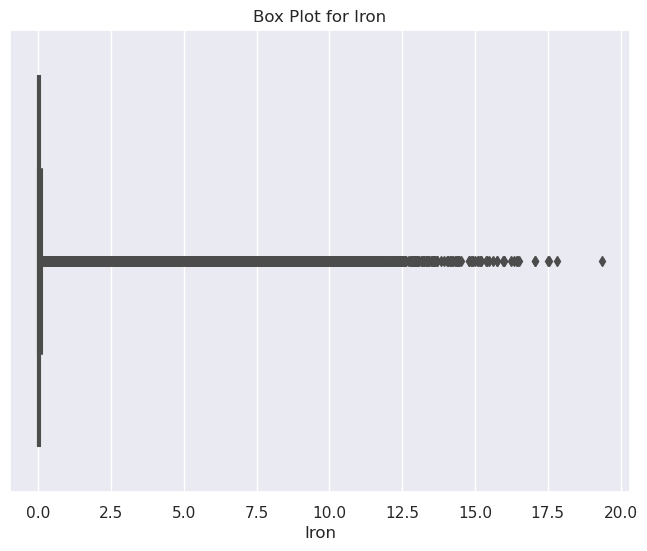

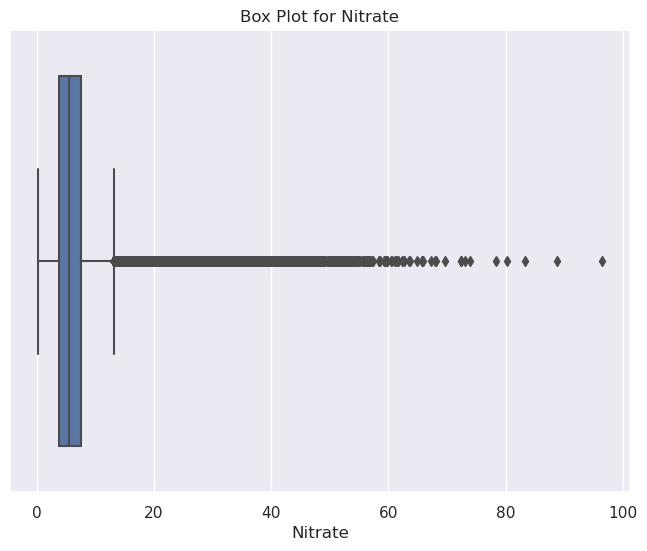

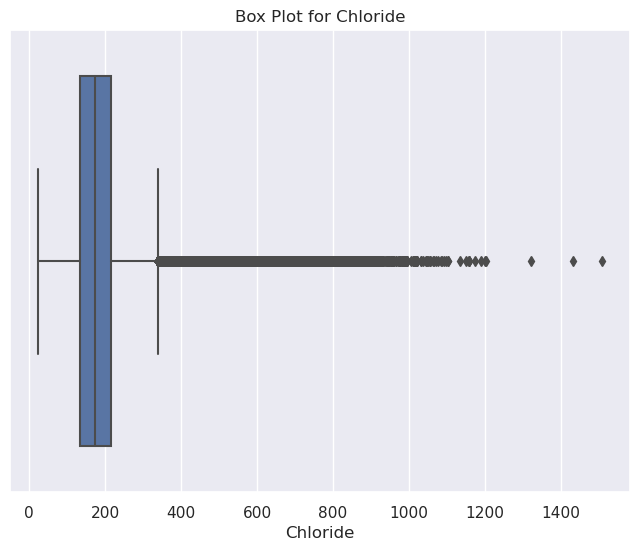

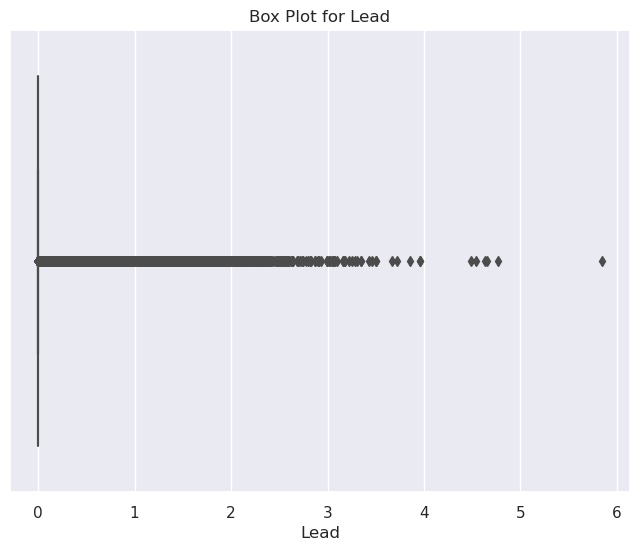

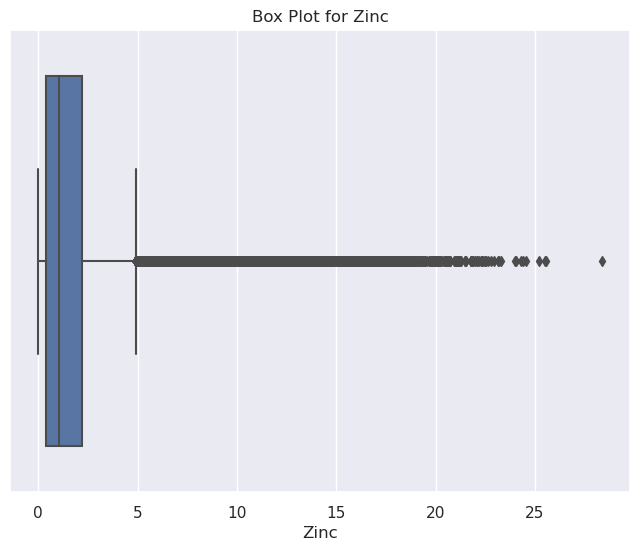

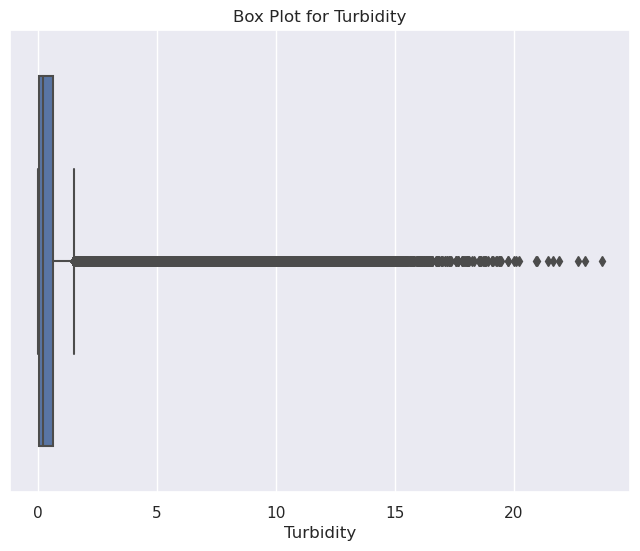

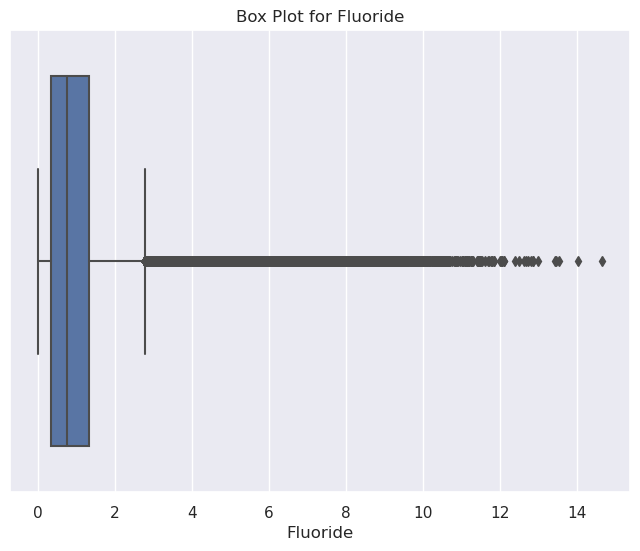

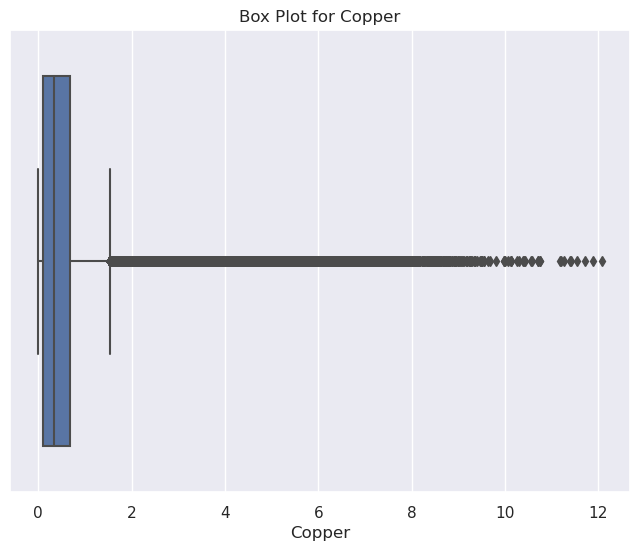

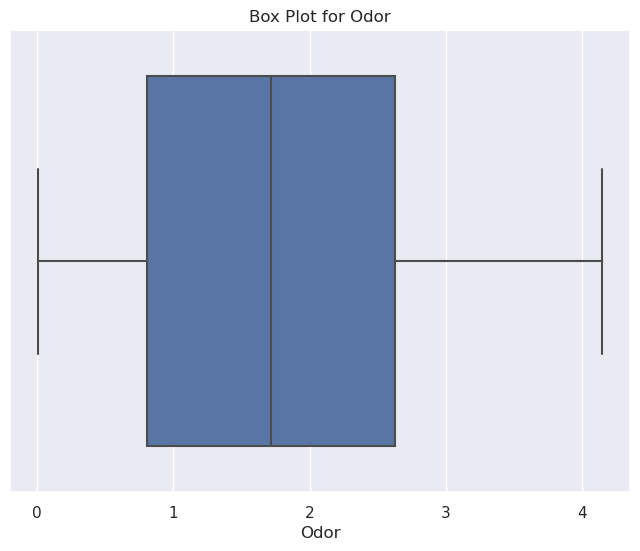

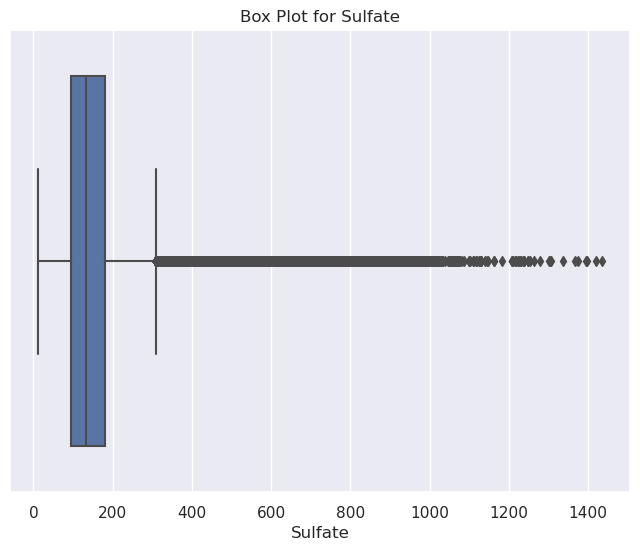

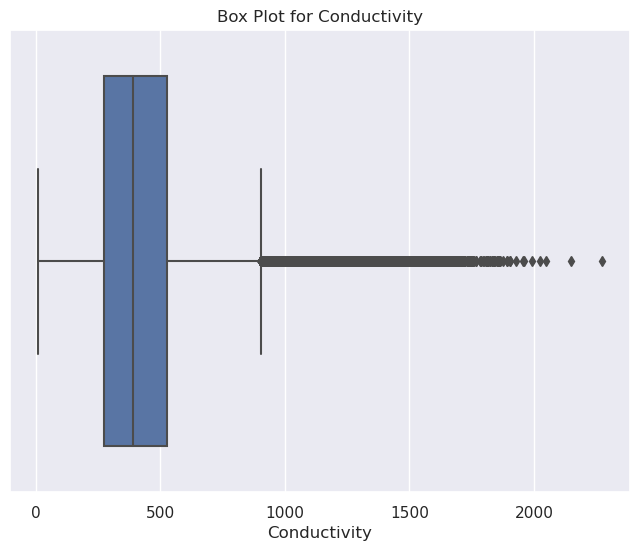

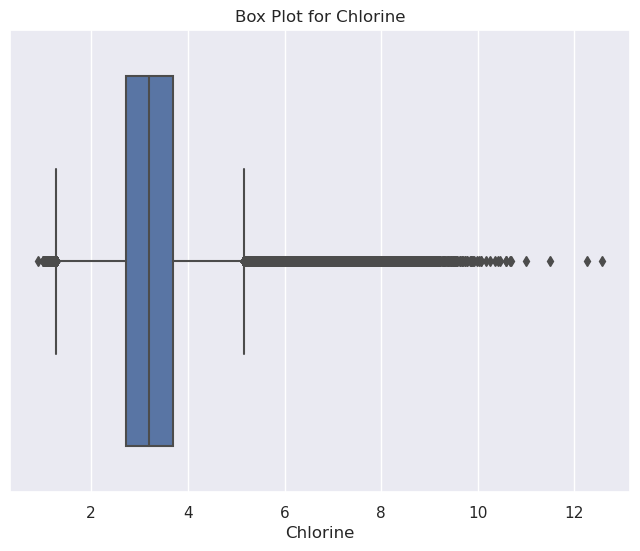

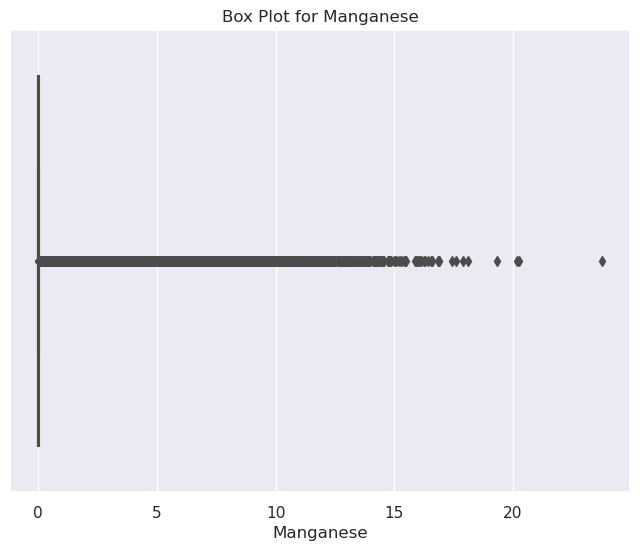

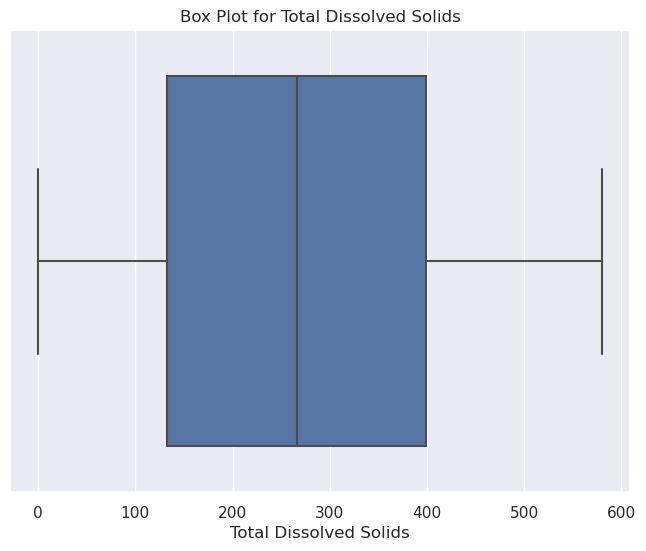

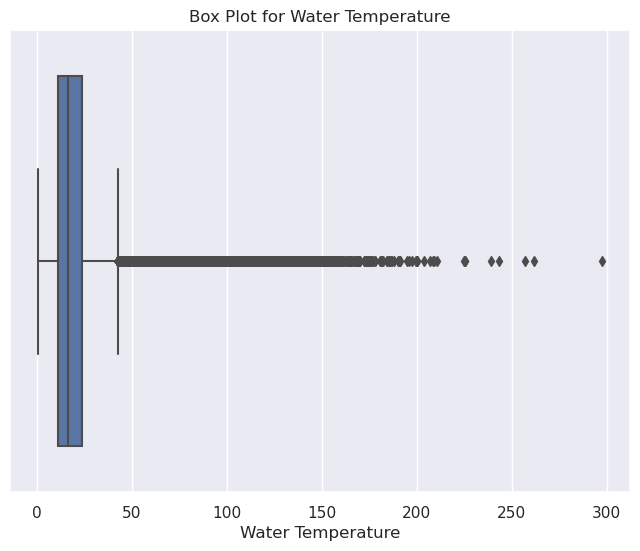

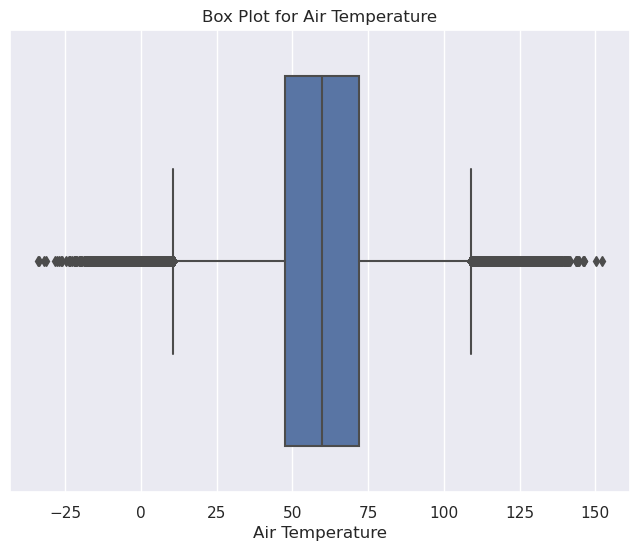

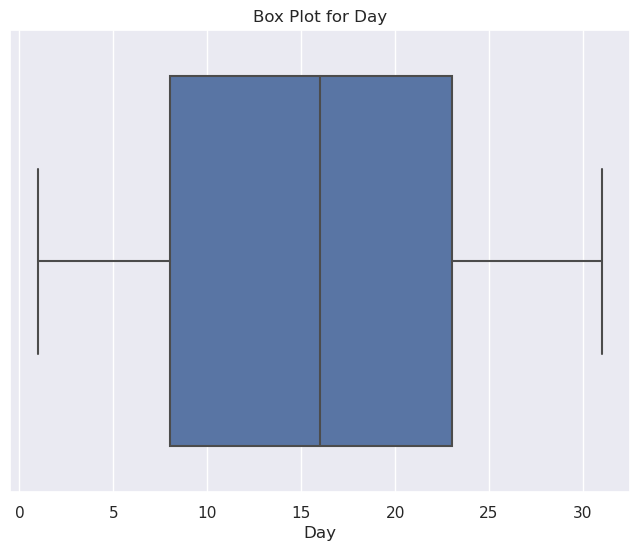

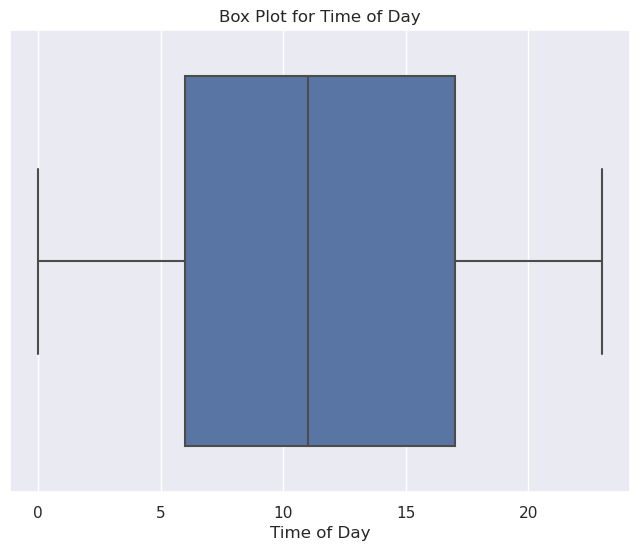

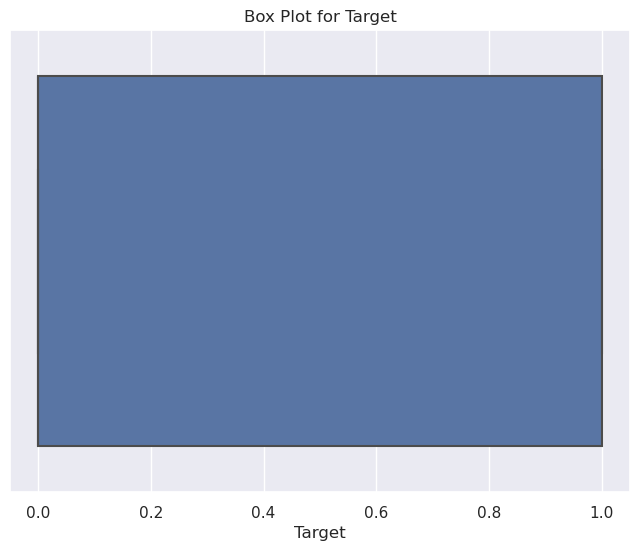

In [23]:
#finding the outliers of the data
for column in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_imputed[column])
    plt.title(f"Box Plot for {column}")
    plt.show()

In [24]:
#encoding the data
from sklearn.preprocessing import LabelEncoder

def encode_categorical_cols(df_imputed, cols):
    le = LabelEncoder()
    for col in cols:
        if col in df_imputed.columns:
            df_imputed[col] = le.fit_transform(df_imputed[col].astype(str))
    return df_imputed

# Assuming 'df_imputed' is the DataFrame with imputed values
categorical_cols = ['Source', 'Color', 'Month']  # Replace with the names of your categorical columns

df_encoded = encode_categorical_cols(df_imputed, categorical_cols)


In [25]:
df_encoded

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,0,8.332988,0.000083,8.605777,122.799772,3.713298e-52,3.434827,0,0.022683,0.607283,...,3.708178,2.269945e-15,332.118789,6,1.369793,43.493324,4,29.0,4.0,0.0
1,1,6.917863,0.000081,3.734167,227.029851,7.849262e-94,1.245317,1,0.019007,0.622874,...,3.292038,8.024076e-07,284.641984,2,15.348981,71.220586,9,26.0,16.0,0.0
2,2,5.443762,0.020106,3.816994,230.995630,5.286616e-76,0.528280,2,0.319956,0.423423,...,3.560224,7.007989e-02,570.054094,4,11.643467,44.891330,4,31.0,8.0,0.0
3,3,7.955339,0.143988,8.224944,178.129940,3.997118e-176,4.027879,3,0.166319,0.208454,...,3.516907,2.468295e-02,100.043838,1,10.092392,60.843233,0,1.0,21.0,0.0
4,4,8.091909,0.002167,9.925788,186.540872,4.171069e-132,3.807511,2,0.004867,0.222912,...,3.177849,3.296139e-03,168.075545,5,15.249416,69.336671,6,29.0,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956837,5956837,8.418457,0.000095,8.427576,256.570863,4.751543e-26,4.967504,1,3.824532,0.541850,...,2.630130,9.608234e-03,545.990529,7,21.436974,70.493951,3,8.0,8.0,1.0
5956838,5956838,7.950573,0.215729,4.677850,292.727780,4.679421e-12,1.842063,3,1.181166,2.747241,...,3.555576,1.875424e-11,514.136530,1,19.064632,67.052475,11,8.0,6.0,1.0
5956839,5956839,8.145572,0.000005,7.112877,254.831175,3.150254e-56,0.656923,0,1.769609,1.398686,...,3.127251,1.199405e+00,336.947289,6,5.863636,64.086020,4,16.0,11.0,1.0
5956840,5956840,8.273548,0.001236,10.182408,122.842038,4.226073e-33,0.903032,2,0.366909,3.076229,...,2.762962,2.824411e+00,112.458644,6,28.034083,18.158372,7,29.0,13.0,1.0


In [26]:
df_encoded.to_csv("Water_Quality_Prediction.csv")

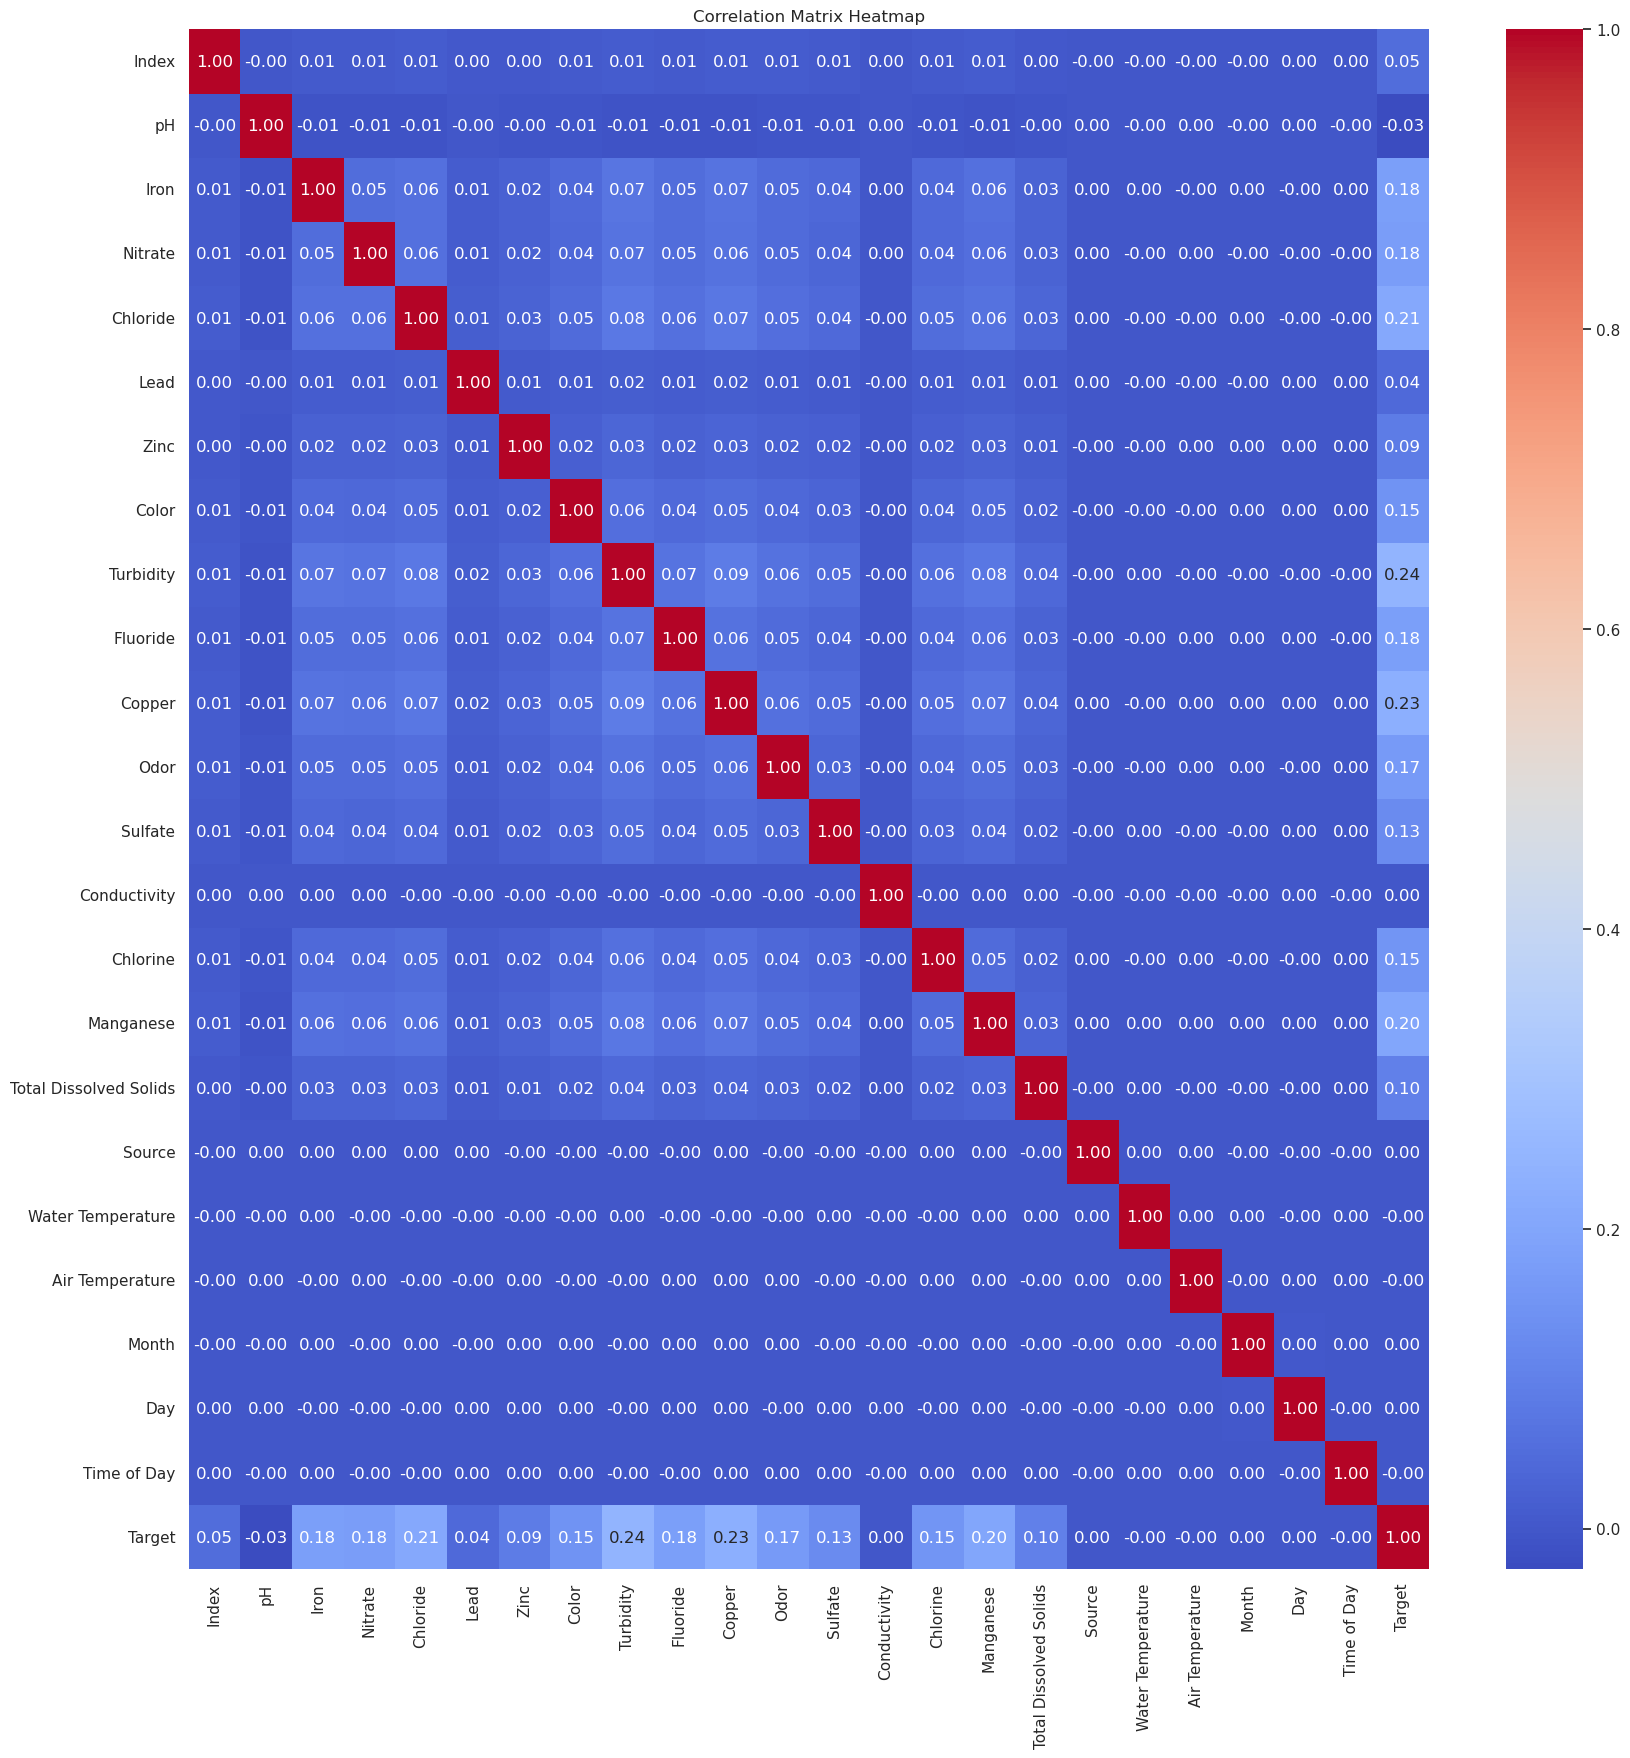

In [27]:
#Since the correlation value is very regulated there is no need to drop any column
correlation_matrix = df_imputed.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [28]:
#separate data into dependent and independent variables
x=df_imputed.drop(['Index','Target'], axis=1)
y=df_imputed['Target']

In [29]:
!pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter


print(Counter(y))

Counter({0.0: 4151590, 1.0: 1805252})


In [30]:
#balancing the masks

ros=RandomOverSampler()

x_ros,y_ros=ros.fit_resample(x,y)
print(Counter(y_ros))

#Scaling
scaler=MinMaxScaler((-1,1))   #you can set the range acc to your wish
x=scaler.fit_transform(x_ros)
y=y_ros

Counter({0.0: 4151590, 1.0: 4151590})


In [41]:
from sklearn.decomposition import PCA

pca=PCA(.95)
x_pca=pca.fit_transform(x)

print(x.shape)
print(x_pca.shape)  

(8303180, 22)
(8303180, 9)


In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test=train_test_split(x_pca,y, test_size=0.2, random_state=42)

In [43]:
#NN
import keras
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

In [44]:
def model():
    classifier=Sequential()
    classifier.add(Dense(15,input_shape=(x_train.shape[1],),activation='relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(15,activation='relu'))
    classifier.add(Dropout(0.4))
    #binary hai isliye dense o/p should be 1 [gives 0,1 as o/p]
    classifier.add(Dense(1,activation='sigmoid'))
    classifier.compile(optimizer='adam', loss="binary_crossentropy", metrics=["accuracy"])
    
    return classifier


In [45]:
x_train.shape[1]# no of attributes

9

In [46]:
model=model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 15)                150       
                                                                 
 dropout_2 (Dropout)         (None, 15)                0         
                                                                 
 dense_4 (Dense)             (None, 15)                240       
                                                                 
 dropout_3 (Dropout)         (None, 15)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 16        
                                                                 
Total params: 406
Trainable params: 406
Non-trainable params: 0
_________________________________________________________________


In [47]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=5, verbose=1)

Epoch 1/5
207580/207580 [==============================] - 444s 2ms/step - loss: 0.5504 - accuracy: 0.7438 - val_loss: 0.5059 - val_accuracy: 0.7815
Epoch 2/5
207580/207580 [==============================] - 425s 2ms/step - loss: 0.5429 - accuracy: 0.7524 - val_loss: 0.5087 - val_accuracy: 0.7812
Epoch 3/5
207580/207580 [==============================] - 418s 2ms/step - loss: 0.5420 - accuracy: 0.7536 - val_loss: 0.5101 - val_accuracy: 0.7821
Epoch 4/5
207580/207580 [==============================] - 444s 2ms/step - loss: 0.5411 - accuracy: 0.7547 - val_loss: 0.5061 - val_accuracy: 0.7825
Epoch 5/5
207580/207580 [==============================] - 444s 2ms/step - loss: 0.5407 - accuracy: 0.7559 - val_loss: 0.5055 - val_accuracy: 0.7884


In [48]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [49]:
    
def plot_auc(y_true, y_pred_prob):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob, pos_label=1)
    fig, c_ax = plt.subplots(1, 1, figsize=(9, 9))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.legend()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.show()

def plot_precision_recall_curve_helper(y_true, y_pred_prob):
    plt.figure(figsize=(10, 6))
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred_prob, pos_label=1)
    aps = average_precision_score(y_true, y_pred_prob)
    plt.plot(recall, precision, label='%s (AP Score:%0.2f)' % ('classification', aps))
    plt.legend()
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()


In [50]:
def plot_history(history):
    f=plt.figure()
    f.set_figwidth(15)
    

    # Plot model loss
    f.add_subplot(1,2,1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.legend()

    # Plot model accuracy
    f.add_subplot(1,2,2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.legend()

    plt.show()

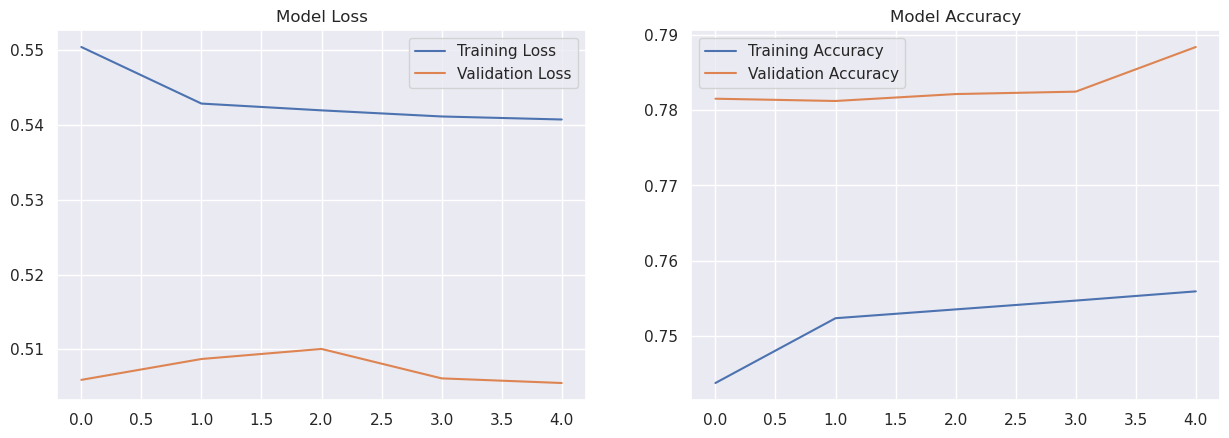

In [51]:
hist=plot_history(history)

51895/51895 [==============================] - 58s 1ms/step


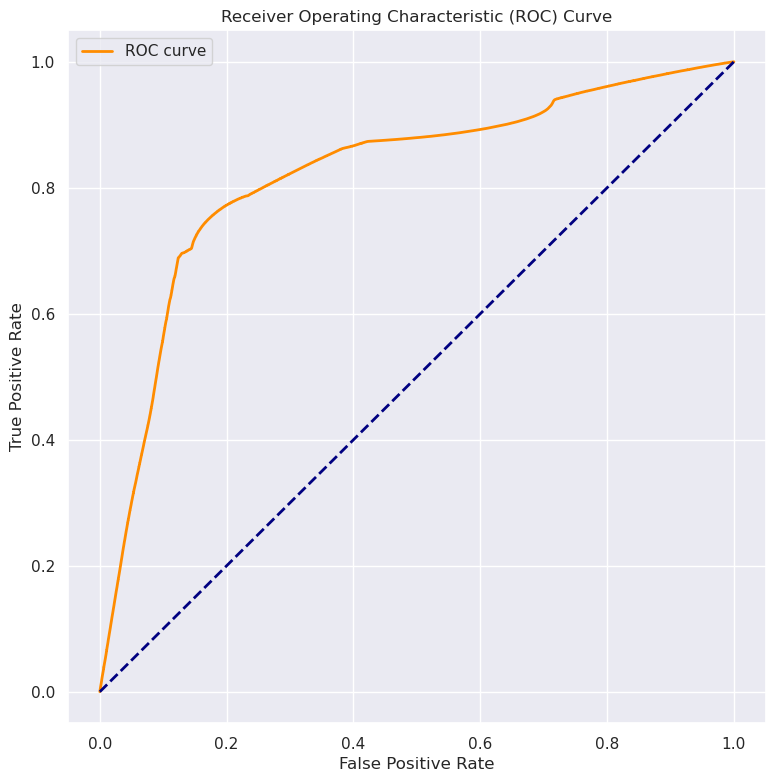

In [52]:
plot_auc(y_test, model.predict(x_test,verbose=True))

In [53]:
from sklearn.metrics import f1_score

# Calculate F1 score

def calc_f1(prec, recall):
    return 2 * (prec * recall) / (prec + recall) if recall and prec else 0

precision, recall, thresholds = precision_recall_curve(y_test, model.predict(x_test, verbose=True))
f1 = [calc_f1(precision[i], recall[i]) for i in range(len(thresholds))]
idx = np.argmax(f1)
threshold = thresholds[idx]

print("F1 Score:", f1[idx])
print("Precision:", precision[idx])
print("Recall:", recall[idx])
print("Threshold:", threshold)

51895/51895 [==============================] - 58s 1ms/step
F1 Score: 0.7834246077888349
Precision: 0.7960595466167711
Recall: 0.7711844822854832
Threshold: 0.48320937


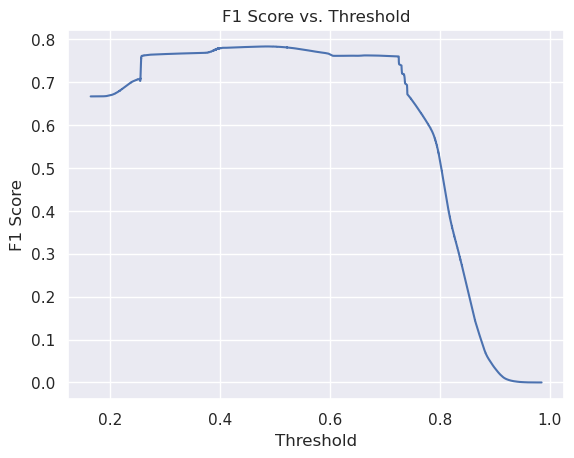

In [54]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(thresholds, f1)
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Threshold')
plt.show()

#beyond 0.606 it starts to dec , coz threshold value is 0.606